In [4]:
import os
import bilby
import numpy as np

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
resultdir = "/home/noah.wolfe/MA499_report_runs/injected/beyond-gr/SNR/beyond-gr_d_phi_2-2E-01_dL-100/beyond-gr_d_phi_2-2E-01_dL-100_hybrid/result"

In [6]:
dphi = ["d_phi_0", "d_phi_1", "d_phi_2", "d_phi_3", "d_phi_4", "d_phi_5L", "d_phi_6", "d_phi_6L", "d_phi_7"]
dalpha = ["d_alpha_2", "d_alpha_3", "d_alpha_4"]
dbeta = ["d_beta_2", "d_beta_3"]

all_dpi = dphi + dalpha + dbeta

In [8]:
results = []
results0 = []
for dpi in tqdm(all_dpi):
    res_path = os.path.join(
        resultdir, 
        f"beyond-gr_d_phi_2-2E-01_dL-100_hybrid_data0_0-0_analysis_H1L1_dynesty_{dpi}_result.json"
    )
    res_overlap0_path = os.path.join(
        resultdir, 
        f"beyond-gr_d_phi_2-2E-01_dL-100_hybrid_data0_0-0_analysis_H1L1_dynesty_{dpi}_no-overlap_result.json"
    )

    res = bilby.core.result.read_in_result(res_path)
    res_overlap0 = bilby.core.result.read_in_result(res_overlap0_path)

    results.append(res)
    results0.append(res_overlap0)

    

100%|██████████| 14/14 [05:17<00:00, 22.66s/it]


Text(0.5, 0.98, 'Results with Overlap Cut')

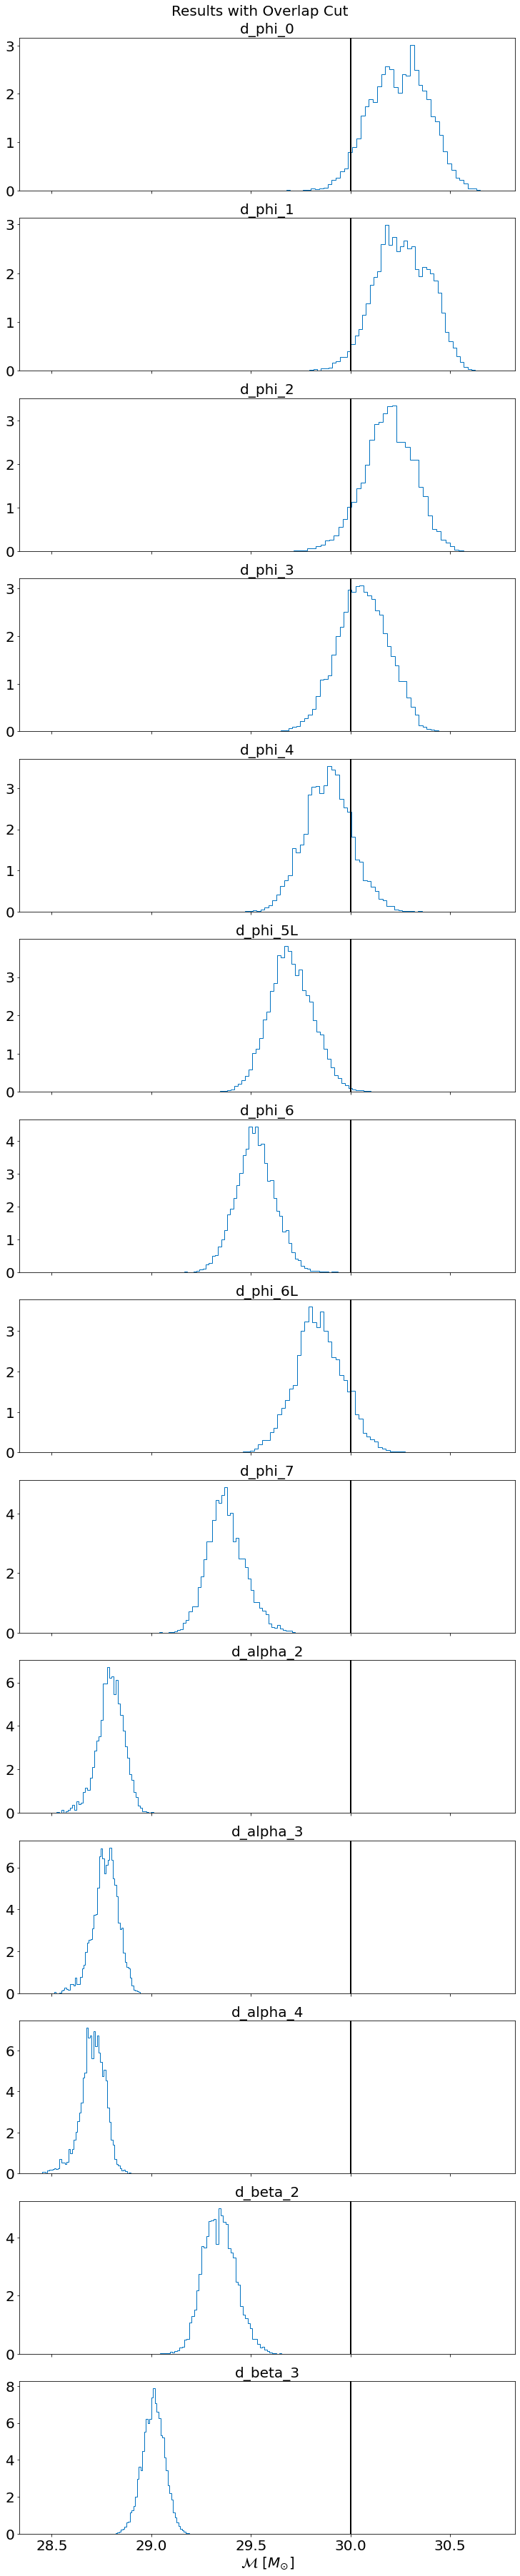

In [21]:
fig, axes = plt.subplots(figsize=(10,50),nrows=len(all_dpi), sharex=True, constrained_layout=True)
for i,(dpi,ax) in enumerate(zip(all_dpi, axes.flat)):
    ax.hist(
        results[i].samples[:,0],
        bins=50,
        histtype="step",
        density=True,
        color='#0072C1',
    )
    ax.axvline(x=30, color="black", linewidth=2)
    ax.tick_params(labelsize=20)
    ax.set_title(dpi, fontsize=20)
    
axes[-1].set_xlabel(r"$\mathcal{M}$ [$M_{\odot}$]", fontsize=20)
fig.suptitle("Results with Overlap Cut", fontsize=20)
#plt.tight_layout()

Text(0.5, 0.98, 'Results without Overlap Cut')

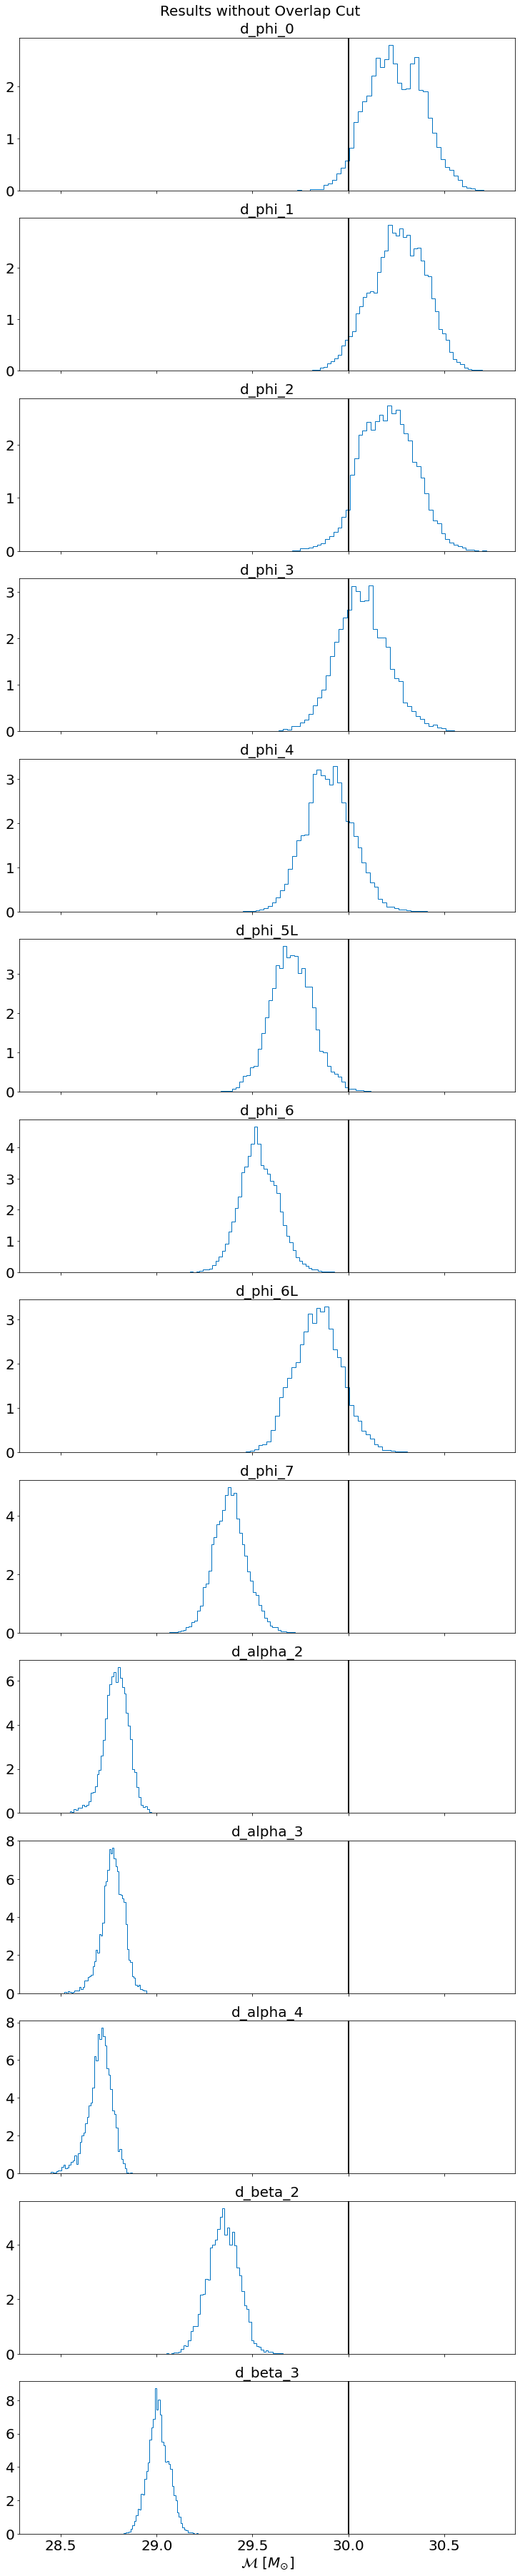

In [25]:
fig, axes = plt.subplots(figsize=(10,50),nrows=len(all_dpi), sharex=True, constrained_layout=True)
for i,(dpi,ax) in enumerate(zip(all_dpi, axes.flat)):
    ax.hist(
        results0[i].samples[:,0],
        bins=50,
        histtype="step",
        density=True,
        color='#0072C1',
    )
    ax.axvline(x=30, color="black", linewidth=2)
    ax.tick_params(labelsize=20)
    ax.set_title(dpi, fontsize=20)
    
axes[-1].set_xlabel(r"$\mathcal{M}$ [$M_{\odot}$]", fontsize=20)
fig.suptitle("Results without Overlap Cut", fontsize=20)

In [ ]:
gr_nest = bilby.core.result.read_in_result("/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/result/hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty_result.json")
dphi2_pt = bilby.core.result.read_in_result("/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/result/hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty_d_phi_2_no-overlap_result.json")
dalpha2_pt = bilby.core.result.read_in_result("/home/noah.wolfe/MA499_report_runs/real/pure-gr/GW150914/hybrid_pure-gr_GW150914/result/hybrid_pure-gr_GW150914_data0_1126259462-391_analysis_H1L1_dynesty_d_alpha_2_no-overlap_result.json")